# K-means clustering

## Loading digits dataset

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
print("Digits: %i samples %i features" % digits.data.shape)

Digits: 1797 samples 64 features


## Exploratory data analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('ggplot')

#print(digits.target_names)

#X = digits.data
#y = digits.target
#df = pd.DataFrame(X, columns = digits.feature_names)
#print(df.head())

## Mall Customer Segmentation Data (kaggle)

In [18]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


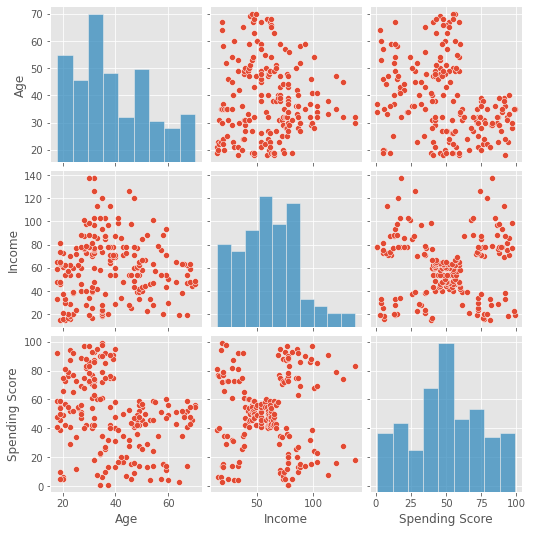

In [21]:
sns.pairplot(df[["Age", "Income", "Spending Score"]])

In [23]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++")
kmeans = kmeans.fit(df[["Spending Score", "Income"]])
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [ ]:
df["Clusters"] = kmeans.labels_